In [60]:
# Competition: https://www.kaggle.com/c/nlp-getting-started/data?select=train.cs

In [78]:
import pandas as pd
import os
import argparse

DATASET_ROOT = './tweets/'


# Parameters

In [63]:
TRAIN_PATH = os.path.join(DATASET_ROOT, 'train.csv')
TEST_PATH = os.path.join(DATASET_ROOT, 'test.csv')


train_df = pd.read_csv(TRAIN_PATH, index_col='id')

train_df.head()


,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [65]:
TEST_PATH = os.path.join(DATASET_ROOT, 'test.csv')

test_df = pd.read_csv(TEST_PATH, index_col = 'id')

test_df.head()

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Process tweets

- Remove non-letter characters like punctuation, digits, ...
- Stemming letters with nltk.stem.PoterStemmer
- Remove stop words
- lower case 

In [66]:
import re
import random
import nltk
from nltk.corpus import stopwords

def clean_text (text):
    #Remove anything not character letter 
    text = re.sub(r"(https?:\S+)|(www.\S+)",  '', text)
    #Remove &amp, &lt, &gt and stuff like that. Things starts with the & symbol
    text = re.sub(r"&\S+", '', text)
    #Remove anything that is not from a-z or A-Z
    text = re.sub(r"([^a-zA-Z']+)",  ' ', text)

    return text

train_df['text'] = train_df['text'].apply(clean_text)

test_df['text'] = test_df['text'].apply(clean_text)


# A little EDA 
- Plot bar chart 'target' column to see distribution
- Check for data shape and missing values

Train shape  (7613, 4)
Test shape  (3263, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 0 to 10875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   3237 non-null   object
 1   location  2158 non-null   object
 2   text      3263 non-null   object
dtypes: object(3)
memory usage: 102.0+ KB
None


/Users/nguyen/opt/anaconda3/envs/kaggle/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


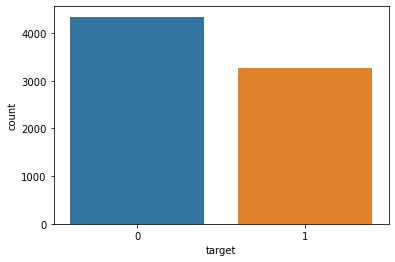

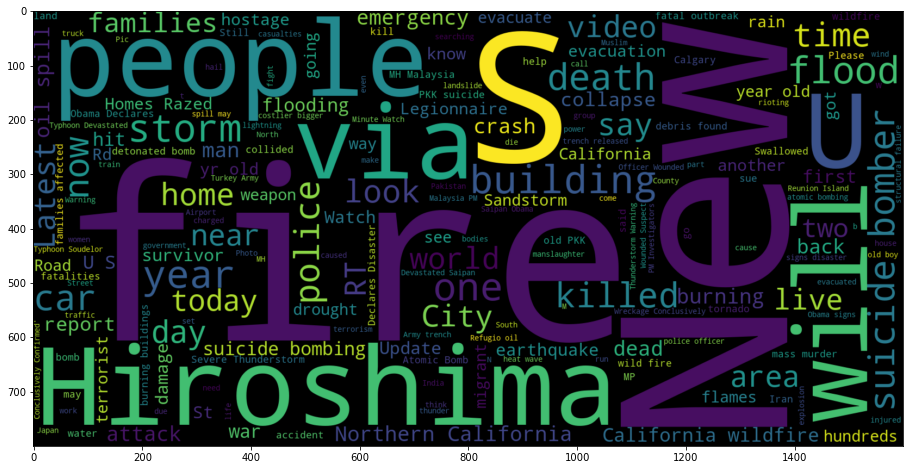

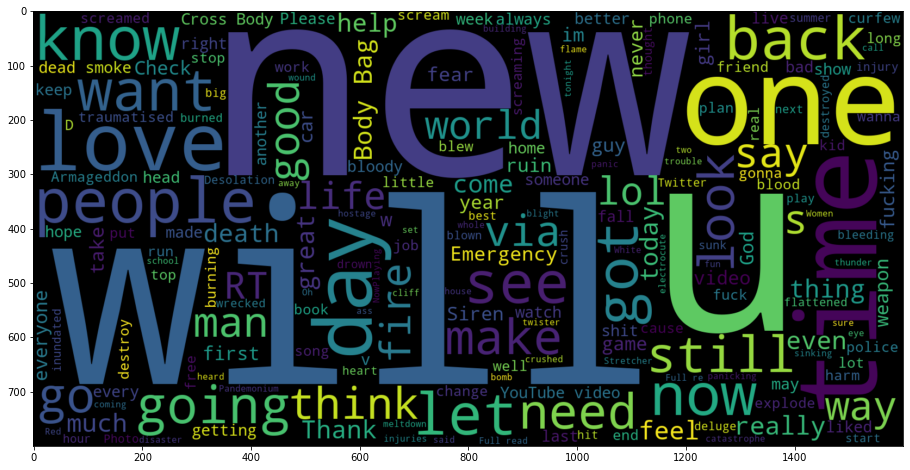

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

print('Train shape ', train_df.shape)
print('Test shape ', test_df.shape)

print(train_df.info())
print(test_df.info())

sns.countplot(train_df['target'])

stop_words = stopwords.words('english')
#Word cloud for positive target
plt.figure(figsize=(16,8))
word_cloud = WordCloud(width=1600, height = 800).generate(' '.join(train_df[train_df['target'] == 1]['text']))
plt.imshow(word_cloud, interpolation='bilinear')

#Word cloud for negative target
plt.figure(figsize=(16,8))
word_cloud = WordCloud(width=1600, height = 800).generate(' '.join(train_df[train_df['target'] == 0 ]['text']))
plt.imshow(word_cloud, interpolation='bilinear')

In [68]:
print(train_df['text'].iloc[10])

Three people died from the heat wave so far


In [69]:
# Used for below experiments
x_train = train_df['text']
y_train = train_df['target']

# Building models using sklearn 

In [70]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

max_features_trials = [5000, 8000, 10000, 12000]

for max_feature in max_features_trials:

    vectorizer = TfidfVectorizer(max_features= max_feature)

    processed_x_train = vectorizer.fit_transform(x_train)

    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

    estimator = RandomForestClassifier()
    params = {
        'n_estimators': (10,20,50,100,200,500,1000)
    }
    best_model = GridSearchCV(estimator, params, verbose = 1, n_jobs= -1)

    best_model.fit(processed_x_train, y_train)
    print('best params: ', best_model.best_params_)
    print(best_model.cv_results_['mean_test_score'])



Fitting 5 folds for each of 7 candidates, totalling 35 fits
best params:  {'n_estimators': 1000}
[0.66084712 0.67726779 0.68265337 0.68948225 0.69040261 0.68948277
 0.69184722]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best params:  {'n_estimators': 200}
[0.66781078 0.68922151 0.68777475 0.69368707 0.69421278 0.69014058
 0.69395049]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best params:  {'n_estimators': 500}
[0.6796306  0.68317796 0.69066534 0.69263634 0.69421511 0.69447594
 0.69421322]
Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [ ]:
print(best_model.best_params_)
best_model.cv_results_['mean_test_score']

# Prepare the text 
- Tokenize it 


In [71]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

args = argparse.Namespace(
    vocabulary_size = 40000,
    embedding_size = 200,
    model_input_length = 200,
    trunc_type = 'post',
    padding_type = 'post',
    max_len = 80,
    batch_size = 32,
    epochs = 5 
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_sequence = tokenizer.texts_to_sequences(x_train)

x_padded = pad_sequences(x_sequence, truncating=args.trunc_type, padding=args.padding_type, maxlen= args.max_len)

print(x_padded)

[[ 111 4455   21 ...    0    0    0]
 [ 179   41  209 ...    0    0    0]
 [  35 1711 1578 ...    0    0    0]
 ...
 [ 137  745  617 ...    0    0    0]
 [  73 1117   36 ...    0    0    0]
 [   1  197   50 ...    0    0    0]]


# Building models using keras 

In [72]:
from sklearn import model_selection, linear_model
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

#Building LSTM model
model = Sequential()
model.add(Embedding(args.vocabulary_size, args.embedding_size))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         8000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               135680    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [73]:

model.fit(x_padded, y_train, batch_size = args.batch_size, validation_split=0.2, epochs = args.epochs)

/Users/nguyen/opt/anaconda3/envs/kaggle/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/5
6090/6090 [==============================] - 91s 15ms/step - loss: 0.5206 - accuracy: 0.7419 - val_loss: 0.4848 - val_accuracy: 0.7846
Epoch 2/5
6090/6090 [==============================] - 83s 14ms/step - loss: 0.2699 - accuracy: 0.8980 - val_loss: 0.4971 - val_accuracy: 0.7669
Epoch 3/5
6090/6090 [==============================] - 84s 14ms/step - loss: 0.1428 - accuracy: 0.9493 - val_loss: 0.6382 - val_accuracy: 0.7288
Epoch 4/5
6090/6090 [==============================] - 85s 14ms/step - loss: 0.0862 - accuracy: 0.9691 - val_loss: 0.7465 - val_accuracy: 0.7216
Epoch 5/5
6090/6090 [==============================] - 84s 14ms/step - loss: 0.0567 - accuracy: 0.9759 - val_loss: 0.9996 - val_accuracy: 0.7262


In [76]:
#Try different model 
model = Sequential()
model.add(Embedding(args.vocabulary_size, args.embedding_size))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         8000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         135680    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [77]:
model.fit(x_padded, y_train, batch_size = args.batch_size, validation_split=0.2, epochs = 10)

/Users/nguyen/opt/anaconda3/envs/kaggle/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/10
6090/6090 [==============================] - 149s 24ms/step - loss: 0.5285 - accuracy: 0.7376 - val_loss: 0.4642 - val_accuracy: 0.7938
Epoch 2/10
6090/6090 [==============================] - 135s 22ms/step - loss: 0.2728 - accuracy: 0.8997 - val_loss: 0.5224 - val_accuracy: 0.7525
Epoch 3/10
6090/6090 [==============================] - 137s 23ms/step - loss: 0.1505 - accuracy: 0.9493 - val_loss: 0.5840 - val_accuracy: 0.7452
Epoch 4/10
6090/6090 [==============================] - 127s 21ms/step - loss: 0.0875 - accuracy: 0.9690 - val_loss: 0.6979 - val_accuracy: 0.7374
Epoch 5/10
6090/6090 [==============================] - 142s 23ms/step - loss: 0.0675 - accuracy: 0.9741 - val_loss: 0.9877 - val_accuracy: 0.7439
Epoch 6/10
6090/6090 [==============================] - 163s 27ms/step - loss: 0.0488 - accuracy: 0.9773 - val_loss: 1.1505 - val_accuracy: 0.7157
Epoch 7/10
6090/6090 [==============================] - 182s 30ms/step

# NOTE!! DO NOT TOUCH THE TEST SET BEFORE YOU'RE CONFIDENT

In [ ]:
#Final validation here